### Homework 1.4.1 - Shooting Method

By using shooting method, solve

$$
\frac{d^2 T}{d x^2} + \alpha (T_0 - T) = 0
$$

Where $\alpha = 5\times10^{-2}$, and $T_0 = 20$, subjected to $T(0) = 50$ and $T(10) = 200$

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import brentq

In [22]:
alpha = 5. *10**(-2)
T0=20
x=np.arange(0,11)
def rhs(t,x):
    return np.array([t[1],-alpha*(T0-t[0])])

dT/dx at x = 0 is 1.8396902848193653


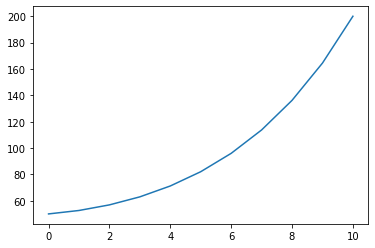

In [44]:
def objective_func(guess):
    ans = odeint(rhs,np.array([50,guess]),x)
    y_final = ans[-1, 0]
    return y_final - 200

tp0=brentq(objective_func, -50, 50)
print(f'dT/dx at x = 0 is {tp0}')

plt.plot(x,odeint(rhs,[50,tp0],x)[:,0])

___
### Homework 1.4.2 - Finite Difference Method

Solve Homework 1.4.1 using finite difference method

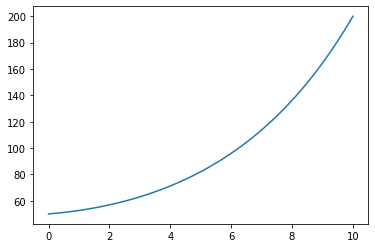

In [46]:
n = 1000
h = (10-0) / n

A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = 1
    A[i, i] = -(2+alpha*h*h)
    A[i, i+1] = 1

b = np.zeros(n+1)
b[0] = 50
b[1:-1] = -alpha*T0 *h*h
b[-1] = 200
plt.plot(np.linspace(0,10,1001),np.linalg.solve(A, b))